<img src="img/Act2_Pic01_Short.png">

<img src="img/Act2_Pic02_Alt.png">

### Setup

In [1]:
# import arcpy
import arcgis
import pandas as pd
import os
from IPython.display import display

In [2]:
gis = arcgis.gis.GIS(url="https://ndirt.maps.arcgis.com", username="ANieto_ndirt")

Enter password: ········


In [3]:
agolgis = arcgis.gis.GIS("https://esrifederal.maps.arcgis.com", username="Anieto_esrifederal")

Enter password: ········


<Item title:"DCVAMD_NBI_Bridges" type:Feature Layer Collection owner:ANieto_ndirt>
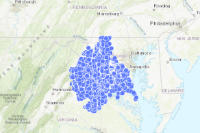

In [4]:
bridge_item = gis.content.search("DCVAMD_NBI_Bridges", item_type="feature service")[0]
bridge_item

<Item title:"DCVAMD_CBSA_DeficientBridges" type:Feature Layer Collection owner:ANieto_ndirt>
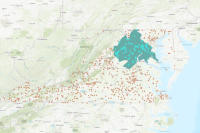

In [5]:
deficient_bridge_item = gis.content.search("DCVAMD_CBSA_DeficientBridges", item_type="feature service")[0]
deficient_bridge_item

<Item title:"bridges_analyzed" type:Feature Layer Collection owner:ANieto_ndirt>
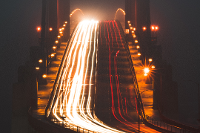

In [6]:
analyzed_bridges_item = gis.content.search("Bridges_Analyzed", item_type="feature service")[2]
analyzed_bridges_item

In [7]:
analyzed_bridges_lyr = analyzed_bridges_item.layers[0]
analyzed_bridges_lyr

<FeatureLayer url:"https://services.arcgis.com/lA2FZKuu26Fips7U/arcgis/rest/services/bridges_analyzed/FeatureServer/0">

In [8]:
analyzed_bridges_item.layers[0].query("1=1")

<FeatureSet> 96 features

In [9]:
# analyzed_bridges_top_ranked = analyzed_bridges_item.layers[0].query("cbsa_rank = 1")
# analyzed_bridges_top_ranked_df = analyzed_bridges_top_ranked.df
# analyzed_bridges_top_ranked_df

In [10]:
commute_df = pd.read_csv(r"data/commute_table.csv")

In [11]:
tract_polys = gis.content.search("DCVAMD_CBSA_Tracts_Polygons", item_type="feature service")[0]
tract_points = gis.content.search("DCVAMD_CBSA_Tracts_Centroids", item_type="feature service")[1]

<Item title:"DCVAMD_CBSA_Tracts_Polygons" type:Feature Layer Collection owner:ANieto_ndirt>
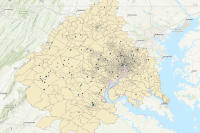

In [12]:
tract_polys

<Item title:"DCVAMD_CBSA_Tracts_Centroids_Work" type:Feature Layer Collection owner:ANieto_ndirt>
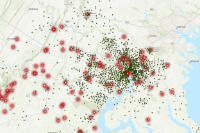

In [13]:
tract_points

In [14]:
route_items = gis.content.search("Test Routes", item_type="feature service")
impaired_route = route_items[0]
normal_route = route_items[1]
origin_dest_points = route_items[2]

<Item title:"Test_Route_Origin_Destination" type:Feature Layer Collection owner:ANieto_ndirt>
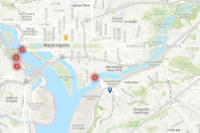

In [15]:
origin_dest_points

<Item title:"Test_Normal_Route" type:Feature Layer Collection owner:ANieto_ndirt>
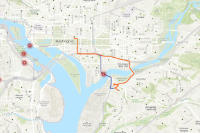

In [16]:
normal_route

<Item title:"Test_Impaired_Route" type:Feature Layer Collection owner:ANieto_ndirt>
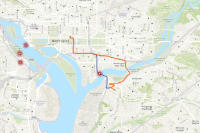

In [17]:
impaired_route

In [18]:
import time

def animate_layer_addition_to_map(map_widget, list_of_items, zoom_level, basemap='gray-vector'):
    # The map widget
    m = map_widget
    m.basemap = basemap
    
    # 1. Parse the find-routes analysis results
    # Extract the output data from the analysis results
    # Store the output points and lines in pandas dataframes
    lines_df = result.output_routes.df
    lines_fset = arcgis.features.FeatureSet.from_dataframe(lines_df)
    
    # 2. Define the map symbology
    # Allocation lines
    allocation_line_symbol_1 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [255,255,255,153], 'width': 0.7}

    allocation_line_symbol_2 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,255,197,39], 'width': 3}

    allocation_line_symbol_3 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,197,255,39], 'width': 5}
    
    allocation_line_symbol_4 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,92,230,39], 'width': 7}
    
    time.sleep(1.5)
    m.draw(shape=result.output_routes, symbol=allocation_line_symbol_4)
    m.draw(shape=result.output_routes, symbol=allocation_line_symbol_2)
    m.draw(shape=result.output_routes, symbol=allocation_line_symbol_1)
    
    m.add_layer(stops_layer)
    
    m.zoom = zoom_level

# 1. Explore Data

### Exploring Bridge Data

Structurally Deficient Bridges in our Area

In [21]:
deficient_bridges_map = agolgis.map('Fairfax County', zoomlevel=8)
deficient_bridges_map.basemap = 'gray-vector'
display(deficient_bridges_map)
deficient_bridges_map.add_layer(deficient_bridge_item)
deficient_bridges_map.extent = deficient_bridge_item.extent

MapView(layout=Layout(height='400px', width='100%'), zoom=8.0)

### Exploring Commuting Data

Table of Commuting Patterns by Tract

In [22]:
commute_df

,Unnamed: 0,OBJECTID,EST,MOE,RES_STATE,WORK_STATE,RESIDENCE_TRACT,WORK_TRACT,ORIGIN_DESTINATION_ID
0,0,1,1630,444,1,1,1089011100,1089011100,01089011100 - 01089011100
1,1,2,1300,340,1,1,1003011502,1003011502,01003011502 - 01003011502
2,2,3,1070,209,1,1,1051030400,1051030400,01051030400 - 01051030400
3,3,4,1055,263,1,1,1081041100,1081041100,01081041100 - 01081041100
4,4,5,1055,330,1,1,1115040501,1115040501,01115040501 - 01115040501
5,5,6,995,214,1,1,1043964900,1043964900,01043964900 - 01043964900
6,6,7,925,208,1,1,1089010501,1089001402,01089010501 - 01089001402
7,7,8,925,199,1,1,1089010621,1089001402,01089010621 - 01089001402
8,8,9,890,262,1,1,1009050102,1009050102,01009050102 - 01009050102
9,9,10,885,219,1,1,1003010703,1003010703,01003010703 - 01003010703


Map of all DC CBSA Tracts

In [23]:
tracts_map = agolgis.map('Arlington, VA', zoomlevel=9)
tracts_map.basemap = 'streets-night-vector'
tracts_map.add_layer(tract_points)
display(tracts_map)
tracts_map.extent = tract_points.extent

MapView(layout=Layout(height='400px', width='100%'), zoom=9.0)

# 2. Ask Questions, Prototype, and Automate an Analysis Workflow

## What would be the impact to commuters if a structurally deficient bridge is impaired?

In [25]:
m2 = agolgis.map('Washington Navy Yard', zoomlevel=12)
m2.basemap = 'gray-vector'
display(m2)
m2.add_layer(origin_dest_points)
m2.extent = origin_dest_points.extent

MapView(layout=Layout(height='400px', width='100%'), zoom=12.0)

In [26]:
m2.add_layer(normal_route)

In [27]:
m2.add_layer(deficient_bridge_item)

In [28]:
m2.add_layer(impaired_route)

## Prototype Analysis Workflow

<img src="img/Analysis_Process.png">

<img src="img/odmc_restriction_01.png">

## Automated Workflow Steps:

#### 1. Set Environment and Retrieve Bridge and Commute Pattern Data

In [ ]:
# Set workspace
processing_workspace = r"D:\ANieto_SolutionEngineer\Projects\FedGIS\ArcGISAPIforPython_Workspace\bridge_processing"
workspace_gdb = r"D:\ANieto_SolutionEngineer\Projects\FedGIS\ArcGISAPIforPython_Workspace\BridgeCriticality_Arcpy_Workspace.gdb"
# workspace_gdb = "C:\\Users\\albe9057\\Documents\\ANieto_SolutionEngineering\\Projects\\FedGIS\\FedGIS_2018\\Plenary_ArcGISAPIforPython\\Work\\Bridge_Criticality_Analysis\\BridgeCriticality_Arcpy_Workspace.gdb"

# Set Arcpy environment
arcpy.env.workspace = workspace_gdb
arcpy.env.overwriteOutput = True

# Set reference to origins
origin_tracts = r"D:\ANieto_SolutionEngineer\Projects\FedGIS\ArcGISAPIforPython_Workspace\BridgeCriticality_Arcpy_Workspace.gdb\DCVAMD_CBSA_Tracts_Centroids"
# origin_tracts = "C:\\Users\\albe9057\\Documents\\ANieto_SolutionEngineering\\Projects\\FedGIS\\FedGIS_2018\\Plenary_ArcGISAPIforPython\\Work\\Bridge_Criticality_Analysis\\Bridge_Criticality_Analysis.gdb\\DCVAMD_CBSA_Tracts_Centroids"
origins_id_field = "ID"
origins_name_field = "NAME"

# Set reference to destinations
dest_tracts = r"D:\ANieto_SolutionEngineer\Projects\FedGIS\ArcGISAPIforPython_Workspace\BridgeCriticality_Arcpy_Workspace.gdb\DCVAMD_CBSA_Tracts_Centroids"
# dest_tracts = "C:\\Users\\albe9057\\Documents\\ANieto_SolutionEngineering\\Projects\\FedGIS\\FedGIS_2018\\Plenary_ArcGISAPIforPython\\Work\\Bridge_Criticality_Analysis\\Bridge_Criticality_Analysis.gdb\\DCVAMD_CBSA_Tracts_Centroids"
dest_id_field = "ID"
dest_name_field = "NAME"

# Set reference to bridges
bridges_fc = "C:\\Users\\albe9057\\Documents\\ANieto_SolutionEngineering\\Projects\\FedGIS\\FedGIS_2018\\Plenary_ArcGISAPIforPython\\Work\\Bridge_Criticality_Analysis\\Bridge_Criticality_Analysis.gdb\\DCVAMD_CBSA_DeficientBridges"
polybarrier_bridges_fc = "C:\\Users\\albe9057\\Documents\\ANieto_SolutionEngineering\\Projects\\FedGIS\\FedGIS_2018\\Plenary_ArcGISAPIforPython\\Work\\Bridge_Criticality_Analysis\\Bridge_Criticality_Analysis.gdb\\DCVAMD_CBSA_DeficientBridges_Polybarriers"
polybarriers_id_field = "OBJECTID"

# Set reference to the network dataset
network_dataset = "C:\\ArcGIS\\Business Analyst\\US_2015\\Data\\Streets Data\\NAVTEQ_2014_Q3_NA.gdb\\Routing\\Routing_ND"

# Set reference to commute table
commute_table = "C:\\Users\\albe9057\\Documents\\ANieto_SolutionEngineering\\Projects\\FedGIS\\FedGIS_2018\\Plenary_ArcGISAPIforPython\\Work\\Bridge_Criticality_Analysis\\Bridge_Criticality_Analysis.gdb\\ctpp_journey_to_work"

# Set reference to impedance values needed for odcm
impedance_value=99999
impedance_attribute="Minutes"
accumulate_attributes = ["Minutes", "Miles"]

#### 2. Perform Bridge Commuting Impacts Analysis

In [ ]:
arcgis.network.analysis.generate_origin_destination_cost_matrix?

##### Run ODCM for Nominal Commute

In [ ]:
if os.path.isfile("nominal_odcm.csv"):
    print("Found nominal ODCM. Using processed data...")
    nominal_odcm_df = pd.DataFrame.from_csv("nominal_odcm.csv")
    
else:

    # Run nominal ODCM using tracts to tracts
    nominal_odcm = create_odcm(gdb=workspace_gdb,
                               origins_fc=origin_tracts,
                               origins_id_field=origins_id_field,
                               origins_name_field=origins_name_field,
                               destinations_fc=dest_tracts,
                               destinations_id_field=dest_id_field,
                               destinations_name_field=dest_name_field,
                               odcm_name="nominal_baseline",
                               network_dataset=network_dataset,
                               impedance_value=impedance_value,
                               impedance_attribute=impedance_attribute,
                               accumulate_attribute_name=accumulate_attributes,
                               polybarrier_fc=None,
                               polybarrier_id_field=None,
                               polybarrier_name_field=None,
                               impedance_attribute_field_name="Dij",
                               use_lines=False,
                               out_na_layer_name="Origins2Destinations",
                               validate_inputs=False,
                               method_message="create_odcm: ",
                               output_origin_id_field_name='origin_id',
                               output_origin_name_field_name='origin_name',
                               output_dest_id_field_name='destination_id',
                               output_dest_name_field_name='destination_name',
                               logger_object=None)

    # Convert the odcm gis table to a pandas dataframe
    print("Calculating ID Fields...")
    nominal_odcm_df = convert_gis_table_to_pddataframe(nominal_odcm)
    nominal_odcm_df['OriginID'] = nominal_odcm_df.apply(lambda row: get_origin_id_from_odid(row['Name']), axis=1)
    nominal_odcm_df['DestinationID'] = nominal_odcm_df.apply(lambda row: get_dest_id_from_odid(row['Name']), axis=1)
    nominal_odcm_df.to_csv("nominal_odcm.csv")

nominal_odcm_df.head()

##### Run Bridge Iteration: For each Bridge, Run ODCM with Bridge Feature as a Network Barrier

In [ ]:
# Set iteration: Structurally Deficient Bridges in DC Metropolitan Region from NBI data

# Build list of buffered bridges
bridges_list = [row[0] for row in arcpy.da.SearchCursor(polybarrier_bridges_fc, polybarriers_id_field)]

# Make bridges processing directory
bridge_dir_path = r"D:\ANieto_SolutionEngineer\Projects\FedGIS\ArcGISAPIforPython_Workspace\bridge_processing"

if not os.path.isdir(bridge_dir_path):
    os.mkdir(bridge_dir_path)
    brigde_dir = bridge_dir_path
else:
    bridge_dir = bridge_dir_path

os.chdir(bridge_dir)

# For each bridge
for bridge in bridges_list:
    
    print("\nChecking bridge {0} of {1}...".format(str(bridge), str(len(bridges_list))))
    if os.path.isfile("impacted_commuters_odcm_{0}.csv".format(str(bridge))):
        print("Found bridge. Using processed data...")
        impacted_commuters_df = pd.DataFrame.from_csv("impacted_commuters_odcm_{0}.csv".format(str(bridge)))

    else:

        print("\nProcessing bridge {0} of {1}...".format(str(bridge), str(len(bridges_list))))
        # Set where clause
        bridge_sql = "{0} = {1}".format(arcpy.AddFieldDelimiters(polybarrier_bridges_fc, polybarriers_id_field), bridge)

        # Export feature to act as a single polyline barrier
        polybarrier_bridge_fc = arcpy.Select_analysis(polybarrier_bridges_fc, "{0}/Bridge_{1}".format(workspace_gdb, str(bridge)), bridge_sql)

        # Run impaired ODCM using tracts to tracts, using a bridge feature as a polygon barrier
        impaired_odcm = create_odcm(gdb=workspace_gdb,
                                origins_fc=origin_tracts,
                                origins_id_field=origins_id_field,
                                origins_name_field=origins_name_field,
                                destinations_fc=dest_tracts,
                                destinations_id_field=dest_id_field,
                                destinations_name_field=dest_name_field,
                                odcm_name="impaired_test",
                                network_dataset=network_dataset,
                                impedance_value=impedance_value,
                                impedance_attribute=impedance_attribute,
                                accumulate_attribute_name=accumulate_attributes,
                                polybarrier_fc=polybarrier_bridge_fc,
                                polybarrier_id_field=polybarriers_id_field,
                                polybarrier_name_field="ITEM6A",
                                impedance_attribute_field_name="Dij",
                                use_lines=False,
                                out_na_layer_name="Origins2Destinations",
                                validate_inputs=False,
                                method_message="create_odcm: ",
                                output_origin_id_field_name='origin_id',
                                output_origin_name_field_name='origin_name',
                                output_dest_id_field_name='destination_id',
                                output_dest_name_field_name='destination_name',
                                logger_object=None)

        # Convert the odcm gis table to a pandas dataframe
        impaired_odcm_csv = gis_table_to_csv(impaired_odcm, bridge_dir, "impaired_odcm_{0}.csv".format(str(bridge)))
        impaired_odcm_df = pd.DataFrame.from_csv(impaired_odcm_csv)
        
#         impaired_odcm_df = convert_gis_table_to_pddataframe(impaired_odcm)
        impaired_odcm_df['OriginID'] = impaired_odcm_df.apply(lambda row: get_origin_id_from_odid(row['Name']), axis=1)
        impaired_odcm_df['DestinationID'] = impaired_odcm_df.apply(lambda row: get_dest_id_from_odid(row['Name']), axis=1)
        impaired_odcm_df.to_csv("impaired_odcm_{0}.csv".format(str(bridge)))

        # Join nominal and impaired ODCM dataframes
        nom_imp_odcm_df = pd.merge(nominal_odcm_df, impaired_odcm_df, how="left", on="Name")

        # Join nominal+impaired ODCM dataframe to commute dataframe (inner join; remove anything not common)
        commute_impacts_df = pd.merge(commute_df, nom_imp_odcm_df, how="inner", left_on="ORIGIN_DESTINATION_ID", right_on="Name")
        commute_impacts_df.to_csv("commute_impacts_odcm_{0}.csv".format(str(bridge)))

        # Identify deltas in impedance
        commute_impacts_df['minutes_diff'] = commute_impacts_df['Total_Minutes_x'] - commute_impacts_df['Total_Minutes_y']
        commute_impacts_df['miles_diff'] = commute_impacts_df['Total_Miles_x'] - commute_impacts_df['Total_Miles_y']
        impacted_commuters_df = commute_impacts_df.loc[commute_impacts_df['minutes_diff'] > 0]
        impacted_commuters_df.to_csv("impacted_commuters_odcm_{0}.csv".format(str(bridge)))

    # Calculate count and impedance sum in deltas
    routes_impacted = impacted_commuters_df.shape[0]
    commuters_impacted = commuters_impacted = impacted_commuters_df['EST'].sum()
    total_additional_minutes = impacted_commuters_df['minutes_diff'].sum()
    total_additional_miles = impacted_commuters_df['miles_diff'].sum()

    bridges_df.loc[bridge, "routes_impacted"] = routes_impacted
    bridges_df.loc[bridge, "commuters_impacted"] = commuters_impacted
    bridges_df.loc[bridge, "total_additional_minutes"] = total_additional_minutes
    bridges_df.loc[bridge, "total_additional_miles"] = total_additional_miles
    
    
print("Complete!! GO GATORS")
bridges_df.to_csv(r"C:\Users\albe9057\Documents\GitHub\ArcGISPythonAPI_Projects\Presentation\FedGIS2018\bridges_processed.csv")

##### Calculate "Impact Rank" for bridges for entire study area (CBSA) and for each county

In [ ]:
# Stack rank all bridges based on criticality score
bridges_df['cbsa_rank'] = bridges_df['total_additional_miles'].rank(ascending=False); bridges_df

In [ ]:
# Group-by for county rankings
bridges_df['county_rank'] = bridges_df.groupby('ITEM3')['total_additional_miles'].rank(ascending=False); bridges_df

#### 3. Publish Outputs to WebGIS

In [ ]:
# Publish outputs
bridges_df.to_csv(r"C:\Users\albe9057\Documents\GitHub\ArcGISPythonAPI_Projects\Presentation\FedGIS2018\bridges_analyzed.csv")
# bridges_processed_csv = r"C:\Users\albe9057\Documents\GitHub\ArcGISPythonAPI_Projects\Presentation\FedGIS2018\bridges_processed.csv"
bridges_analyzed_csv = r"C:\Users\albe9057\Documents\GitHub\ArcGISPythonAPI_Projects\Presentation\FedGIS2018\bridges_analyzed.csv"
# Publish csv item
bridges_analyzed_csv_item = gis.content.add({}, bridges_analyzed_csv)
# Convert csv item to hosted layer in ArcGIS Online
bridges_analyzed_lyr = bridges_analyzed_csv_item.publish()

### The ArcGIS API for Python let us document, design, prototype, and run our workflow helped us get to an analysis that can now be deployed. 

# 3. Interpret Results

<Item title:"bridges_analyzed" type:Feature Layer Collection owner:ANieto_ndirt>
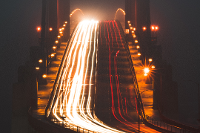

In [29]:
display(analyzed_bridges_item)

#### Map of Analyzed Bridges

In [30]:
analyzed_bridges_map = agolgis.map('Fairfax County', zoomlevel=8)
analyzed_bridges_map.basemap = 'gray-vector'
display(analyzed_bridges_map)
analyzed_bridges_map.add_layer(analyzed_bridges_item)
analyzed_bridges_map.extent = analyzed_bridges_item.extent

MapView(layout=Layout(height='400px', width='100%'), zoom=8.0)

#### Map of Most Critical Bridge, with nominal commutes, and alternative commutes

In [ ]:
analyzed_bridges_sedf = pd.DataFrame.spatial.from_layer(analyzed_bridges_item.layers[0])

In [ ]:
analyzed_bridges_sedf.head()

In [ ]:
analyzed_bridges_sedf.columns.tolist()

In [ ]:
fields_needed = ['OBJECTID',
                 'REGION',
                 'SHAPE',
                 'STATUS',
                 'average_commute_miles_added', 
                 'average_commute_minutes_added', 
                 'cbsa_rank', 
                 'commuters_impacted',
                 'county_rank',
                 'routes_impacted',
                 'total_additional_miles',
                 'total_additional_minutes']

In [ ]:
final_bridges_sedf = analyzed_bridges_sedf[fields_needed]
final_bridges_sedf.head()

In [ ]:
final_bridges_sedf = final_bridges_sedf.iloc[final_bridges_sedf.commuters_impacted is not "False"]

In [ ]:
final_bridges_sedf.commuters_impacted.sort_values(ascending=False)